# Исследования убытков развлекательного приложения Procrastinate Pro+

### Загрузите данные и подготовьте их к анализу

**Документация к проекту:**

![image.png](БМ_ДОК.jpg)

**Ход исследования:**

Для начала работы получим данные из CSV-файлов. Неизвестно в этом датефрейме качество данных, поэтому необходимо перед началом анализа провести первичный обзор данных. Проверим данные на ошибки и оценим их влияние на исследование. На этапе предобработки по возможности исправим данные ошибки, не исказив конечный результат исследования. Найдём актуальные бизнес показатели, затем приступим к исследовательскому анализу. Проанализируем маркетинговую составляющую, оценим окупаемость рекламы. Сделаем общий вывод: найдём возможные причины убытков компании Procrastinate Pro+ и пути их разрешения.

Таким образом, моё исследование пройдёт в 6 этапов:

- Загрузка и подготовка данных к анализу.
- Расчёт бизнес-показателей.
- Исследовательский анализ данных.
- Расчёты маркетинговой составляющей.
- Оценка окупаемости рекламы.
- Подведение итогов работы: возможные причины убытков компании Procrastinate Pro+ и пути их разрешения.

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

**Импортируем необходимые библиотеки**

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime, timedelta

import seaborn as sns

import numpy as np

**Записываем в переменные наши датафреймы**

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv', sep=',')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')

# P.S Можно не указывать необязательный параметр разделителя в CSV если sep=',' !

In [3]:
try:
    orders = pd.read_csv('/datasets/orders_info_short.csv', sep=',')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')

# P.S Можно не указывать необязательный параметр разделителя в CSV если sep=',' !

In [4]:
try:
    ad_costs = pd.read_csv('/datasets/costs_info_short.csv', sep=',')
except:
    ad_costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

# P.S Можно не указывать необязательный параметр разделителя в CSV если sep=',' !

**Выводим случайные 10 строчек датафреймов на экран для проверки правильности чтения файлов и частичного ознакомления:**

In [5]:
visits.sample(10)

,User Id,Region,Device,Channel,Session Start,Session End
18600,617739441737,United States,Mac,FaceBoom,2019-05-20 13:13:58,2019-05-20 13:36:39
18419,742911091319,United States,iPhone,RocketSuperAds,2019-05-20 01:33:24,2019-05-20 01:45:19
116274,821110094639,United States,Mac,TipTop,2019-08-21 13:41:25,2019-08-21 14:09:18
11712,532899021260,United States,Mac,organic,2019-05-13 12:56:28,2019-05-13 13:14:24
97041,816312213697,United States,Mac,organic,2019-08-04 12:42:03,2019-08-04 12:46:59
76452,535943000168,United States,iPhone,TipTop,2019-07-15 09:58:11,2019-07-15 10:09:04
116867,221423516174,United States,iPhone,TipTop,2019-08-21 16:21:51,2019-08-21 16:59:43
141756,977904514143,United States,iPhone,FaceBoom,2019-09-11 03:33:17,2019-09-11 03:35:51
101933,870475483848,United States,iPhone,TipTop,2019-08-09 17:25:31,2019-08-09 17:32:38
143977,379093307331,United States,iPhone,RocketSuperAds,2019-09-14 06:28:36,2019-09-14 07:40:11


Данные считались корректно. С первичного ознакомления всё кажется вполне приемлимым: в нашей выборке из 10-и записей код пользователя уникален; страны, вид девайса, канал привлечения отображаются правильно; время начала сессии не превышает время окончания. Из видимых недостатков только не соблюдение единого стиля названия атрибутов.  

In [6]:
orders.sample(10)

,User Id,Event Dt,Revenue
1642,651168189726,2019-05-27 14:24:07,4.99
4134,901598863835,2019-06-19 22:31:42,4.99
34908,795733451542,2019-09-06 16:30:37,4.99
9936,189115665776,2019-07-29 20:14:31,4.99
2195,553354169053,2019-06-02 01:30:07,4.99
12878,321564843490,2019-08-17 23:42:23,4.99
9986,441043844098,2019-07-29 20:32:48,4.99
28255,593992527931,2019-05-15 12:49:52,4.99
29222,693889963730,2019-06-09 03:03:05,4.99
26249,359735367444,2019-10-23 14:53:37,4.99


Данные считались корректно. Всё кажется вполне приемлимым: в нашей выборке из 10-и записей код пользователя уникален; даты и сумма заказа отображаются правильно. Из видимых недостатков: также не соблюдение единого стиля названия атрибутов, а также не понятно в каких единицах измерения суммы покупок(доллары/евро): будем в дальнейшем считать в условных единицах, позже лучше учточнить этот момент у заказчика).  

In [7]:
ad_costs.sample(10)

,dt,Channel,costs
1796,2019-10-24,lambdaMediaAds,6.40
1582,2019-09-20,WahooNetBanner,40.20
762,2019-06-12,YRabbit,1.26
451,2019-07-31,RocketSuperAds,7.28
1760,2019-09-18,lambdaMediaAds,5.60
600,2019-06-30,TipTop,343.20
217,2019-06-07,MediaTornado,5.52
1717,2019-08-06,lambdaMediaAds,5.60
1514,2019-07-14,WahooNetBanner,20.40
1742,2019-08-31,lambdaMediaAds,9.60


Данные считались корректно. В нашей выборке из 20-и записей даты, каналы привлечения, расходы на рекламу отображаются правильно и без видимых аномалий. Из видимых недостатков только не соблюдение единого стиля названия атрибутов.  

**Задача на предобработку № 1:**
Привести атрибуты во всех датафреймах к единому стилю(snake-case).

In [8]:
# Функция для приведения названий атрибутов к единому стилю
def snake_style(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:
# Применим функцию для всех наших атрибутов
snake_style(visits)
snake_style(orders)
snake_style(ad_costs)

  Привели название атрибутов к единому стилю (выполнили 1-ую задачу предобработки). Типы данных корректны, но повсеместно в полях с датой и временем указан тип 'object', что затрудняет нашу дальнейшую работу(ограничивает использование ряда методов), поэтому изменим тип данных на корректный.

**Задача на предобработку № 2:**
Изменим тип данных в столбцах с датой и временем на 'datetime'.

In [10]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

Преобразовали столбцы к нужным типам данных. Проверим наличие дубликатов.

**Задача на предобработку № 3:**
Постараться найти дубликаты и избавиться от них в случае наличия.

- проверим наличие явных дубликатов:

Используем функцию которая покажет нам информацию о датафреймах для ознакомления:

In [11]:
def duplicated_sum(dataframes, names):
    for frame, name in zip(dataframes, names):
        duplicated_count = frame.duplicated().sum()
        print(f'\033[1m' + 'Количество дубликатов в таблице ' + name + ':' + '\033[0m', duplicated_count)
        temp = frame.copy()
        list_c = list(temp.columns)
        for col_l in list_c:
            print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
                  ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%')
            print('-'* 25)
        display(frame.info())
        display(frame.head(5))
        print()
duplicated_sum([visits, orders, ad_costs], ['visits', 'orders', 'ad_costs'])

Количество дубликатов в таблице visits: 0
user_id : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
region : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
device : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
channel : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
session_start : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
session_end : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: da

None

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40



Количество дубликатов в таблице orders: 0
user_id : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
event_dt : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
revenue : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99



Количество дубликатов в таблице ad_costs: 0
dt : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
channel : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
costs : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Явных дубликатов нет, все преобразования до этого шага сделаны корректно, пропусков также нет.

- проверим наличие неявных дубликатов:

 Проверим наличие дублирования в категориальных столбцах (где уникальных значений не так много): возможно есть одна и та же платформа(например) которая указана на разных языках или в одном случае присутствует опечатка и объединим их при наличии:

1) для 'visits':

In [12]:
for attribute in ['region', 'device', 'channel']:
    print(f'{visits[attribute].unique()} - уникальные категориальные значения атрибута "{attribute}"')
    print()

['United States' 'UK' 'France' 'Germany'] - уникальные категориальные значения атрибута "region"

['iPhone' 'Mac' 'Android' 'PC'] - уникальные категориальные значения атрибута "device"

['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds'] - уникальные категориальные значения атрибута "channel"



Дублирования нет. Также теперь мы знаем что существует всего 4 возможные платформы для сервиса, 4 страны-пользователя, 10 - платных источников трафика (+ 1 бесплатный - 'organic').

2) для 'ad_costs':

In [13]:
print(f'{ad_costs["channel"].unique()} - уникальные категориальные значения атрибута "channel"')

['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds'] - уникальные категориальные значения атрибута "channel"


Неявные дубликаты такого вида отсутствуют. Количество уникальных значений атрибута "channel" = 10 и совпадает со значениями из таблицы 'visits', аномалии также нет. Проверим наличие неявных дубликатов по нескольким столбцам:

In [14]:
visits.duplicated(subset=['user_id', 'session_start', 'session_end']).sum()

0

**Итог этапа предобработки данных:**

Мы успешно совершили ознакомление и подготовку данных. Прочитали файлы, первично ознакомились с содержимым датафреймов, убедились в отсутствии пропусков и дубликатов различного вида, привели атрибуты к корректному типу данных, проверили наличие некоторых аномалий.

Узнали что существует всего 4 страны-пользователя нашего приложения, 4 платформы-пользователя, 10 платных каналов источника трафика и 1 бесплатный. 

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

**Заготовленные функции для решения подобных задач:**

- создания пользовательских профилей:

In [15]:
def get_profiles(sessions, orders, costs):
    # находим параметры первых посещений
    profiles = (sessions.sort_values(by=['user_id', 'session_start'])
                .groupby('user_id')
                .agg(
                    {
                        'session_start' : 'first',
                        'channel' : 'first',
                        'device' : 'first',
                        'region' : 'first'
                    }
                )
                .rename(columns={'session_start' : 'first_ts'})
                .reset_index()
               )
    
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # добавляем признак пользователей, совершивших покупку
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles

In [16]:
# добавляем параметр ad_costs — траты на рекламу
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            # проверяем, встречается ли каждый пользователь
            # среди тех, кто совершил событие event
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

- расчёта удержания:

In [17]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw  = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

- для визуализации удержания:

In [18]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

- расчета конверсии пользователей:

In [19]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

- визуализации конверсии:

In [20]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

- подсчёта LTV и ROI:

In [21]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

- визуализации LTV и ROI:

In [22]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

 - для сглаживания:

In [23]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

**Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.**

Сформируем пользовательские профили для продолжения анализа и сделаем переприсвоение для корректной работы функций:

In [24]:
sessions = visits

events = orders

costs = ad_costs

# преобразуем данные о времени
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

# преобразуем данные о времени
sessions['session_start'] = pd.to_datetime(sessions['session_start'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])


profiles = get_profiles(sessions, orders, events, costs)

profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [25]:
profiles.sample(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
9267,61946732751,2019-10-12 03:19:29,organic,Mac,United States,2019-10-12,2019-10-01,False,0.000000
71481,474349042373,2019-05-24 11:19:42,organic,Android,Germany,2019-05-24,2019-05-01,False,0.000000
111430,742197232339,2019-08-29 11:24:20,TipTop,Mac,United States,2019-08-29,2019-08-01,False,2.971963
122419,816160069428,2019-06-13 19:24:27,FaceBoom,Android,United States,2019-06-13,2019-06-01,False,1.089524
127325,848862501490,2019-08-08 12:39:27,organic,Mac,United States,2019-08-08,2019-08-01,False,0.000000


In [26]:
print(f"{len(profiles['user_id'].unique())} - уникальных пользователя сервиса Procrastinate Pro+")

150008 - уникальных пользователя сервиса Procrastinate Pro+


2) Найдём размах дат привлечения пользователей. Определим минимальную и максимальную даты привлечения пользователей:

In [27]:
print(f"Минимальная дата привлечения пользователей: {profiles['first_ts'].min().date()}")
print(f"Максимальная дата привлечения пользователей: {profiles['first_ts'].max().date()}")
print(f"В нашем распоряжении данные о клиентах за {(profiles['first_ts'].max().date() - profiles['first_ts'].min().date()).days} дней")

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27
В нашем распоряжении данные о клиентах за 179 дней


В нашем распоряжении данные приложения за 179 дней: 150.008 записи, где каждая запись представляет краткую информацию о клиенте(его профиль). Данные представлены с 2019-05-01 по 2019-10-27. Данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года имееются в наших датафреймах, а значит заявленный размах дат, за которые имеются данные о пользователях соотвествует документации.

Зададим горизон и момент анализа:

Возьмём горизон анализа за 14 дней, а момент анализа за дату установленную заказчиком, т.е. за 2019-11-1.

In [28]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

**Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.**

1) Узнаем из каких стран приходят к нам пользователи и в каких масштабах:

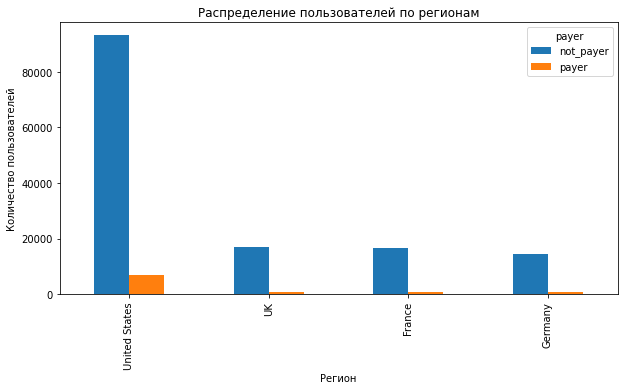

In [29]:
region_counts_payer = profiles.pivot_table(index='region', columns='payer',
                        values='user_id',
                        aggfunc='count').rename(columns={True: 'payer', False: 'not_payer'}).sort_values(by='payer', ascending=False)
          

region_counts_payer.plot(kind='bar', figsize=(10, 5))
plt.title('Распределение пользователей по регионам')
plt.xlabel('Регион')
plt.ylabel('Количество пользователей')
plt.show()

На графике видно что большинство пользователей, а также большинство платящих пользователей приходят из США, поэтому при выборе каналов привлечения необходимо чтобы значительная часть финаносов инвестировалась в каналы для привлечения клиентов из США, т.к. именно они приносят основную прибыль и необходимо проверить окупаются ли данные пользователи вообще.


2) Построим таблицу распределения пользователей в процентах:

Функция для вычисления долей платящих клиентов и построения круговой диаграммы для датафрейма с количеством платящим и неплатящих:

In [30]:
def share_payments_client(df):
    df['payer_share'] = round((df['payer'] / (df['payer'] + df['not_payer']) * 100), 4)
    display(df.style.background_gradient('coolwarm'))
    print('-' * 50)
    df['payer_share'].plot(kind='pie')
    plt.title('Различия в долях платящих клиентов')
    plt.show()

payer,not_payer,payer,payer_share
region,,,
United States,93100,6902,6.901900
UK,16875,700,3.982900
France,16787,663,3.799400
Germany,14365,616,4.111900


--------------------------------------------------


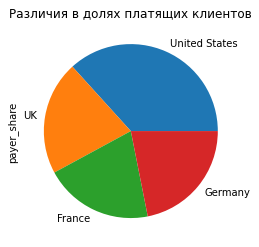

In [31]:
share_payments_client(region_counts_payer)

Клиентов из США не только больше(США - 93100, иные - менее 16876), чем у любого другого региона, но и доля платящих клиентов у них весьма лучше:  6.9019% клиентов из США являются платящими, когда у других регионов менее 4.12%. Потенциально лучший клиент для нашего сервиса - клиент из США, но не забываем что такие клиенты могут обходится слишком дорого нашей компании.

Касаемо других регионов видим: Франция и Анлгия показывают примерно одинаковые показатели по привлечённых пользователям, а также по платящим пользователям, но немного в этих 2-х показателях всё же выигрывает Англия.

Германия привлекает меньше всего пользователей относительно всех наших стран привлечения, но доля платящих у неё выше чем у Анлии или Франции.

Таким образом, по показателю количества привлечений страны располагаются следующим образом:
- США;
- Англия;
- Франция;
- Германия.

По доли платящих клиентов:
- США;
- Германия;
- Англия;
- Франция.

Потенциально стоит увеличить вложения в привлечения клиентов из Германии, а из Франции и Анлглии немного уменьшить если клиенты из Германии окупаются конечно же. Большее количество платящих клиентов стимулируют рост прибыли. 

**Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.**

1) Узнаем какими  устройствами пользуются наши клиенты и какие устройства предпочитают платящие пользователи:

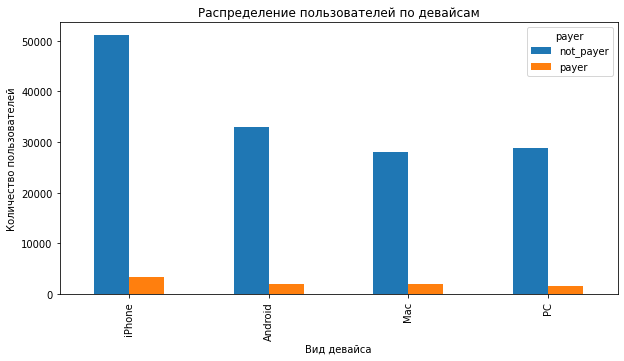

In [32]:
device_counts_payer = profiles.pivot_table(index='device', columns='payer',
                        values='user_id',
                        aggfunc='count').rename(columns={True: 'payer', False: 'not_payer'}).sort_values(by='payer', ascending=False)
          

device_counts_payer.plot(kind='bar', figsize=(10, 5))
plt.title('Распределение пользователей по девайсам')
plt.xlabel('Вид девайса')
plt.ylabel('Количество пользователей')
plt.show()

Вид девайса сильно не влияет на желание приобретать услуги у нашего сервиса: у всех девайсов количество платящих клиентов гамогенны между собой, кроме пользователей Iphone-а. Также из графика ясно что проблем с какой-то конкретной платформой скорее всего нет. Заметно что у пользователей Iphone платящих пользователей немного больше, но и их доля неплатящие клиентов также выше:  вид девайса слабо влияет на конвертацию клиентов. Скорее всего преобладание Iphone-пользователей обусловлено преобладание клиентов из США.

2) Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства:

payer,not_payer,payer,payer_share
device,,,
iPhone,51097,3382,6.207900
Android,32982,2050,5.851800
Mac,28130,1912,6.364400
PC,28918,1537,5.046800


--------------------------------------------------


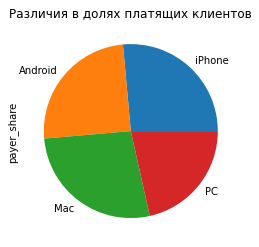

In [33]:
share_payments_client(device_counts_payer)

Как видим и правда доля платящих практически везде одинакова(более детально: Iphone - 6.207%, Android - 5.85%, Mac - 6.3644%, PC - 5.0468), разве что у пользователей ПК она немного, но всё же значительно меньше. Больше всего у нас пользователей Apple, затем Android, после PC.

**Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.**

1)Построим график распределения пользователей по каналу привлечения:

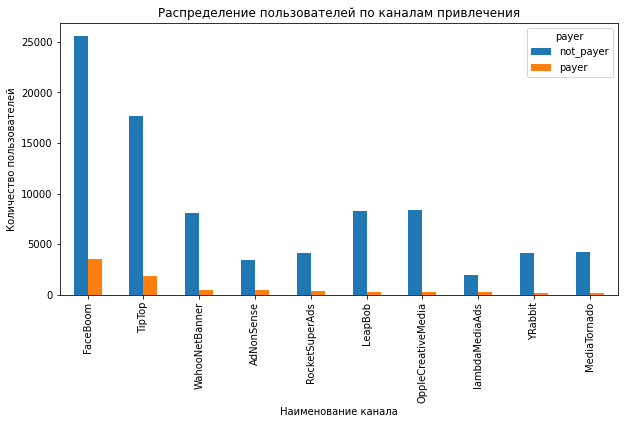

In [34]:
channel_counts_payer = profiles.pivot_table(index='channel', columns='payer',
                        values='user_id',
                        aggfunc='count').rename(columns={True: 'payer', False: 'not_payer'}).sort_values(by='payer', ascending=False)
          

channel_counts_payer.query('channel != "organic"').plot(kind='bar', figsize=(10, 5))
plt.title('Распределение пользователей по каналам привлечения')
plt.xlabel('Наименование канала')
plt.ylabel('Количество пользователей')
plt.show()

FaceBoom и TipTop привлекли больше всего клиентов за эти 179 дней относительно других каналов: узнаем позже окупают ли данные каналы вложения далее.

2) Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

payer,not_payer,payer,payer_share
channel,,,
FaceBoom,25587,3557,12.204900
TipTop,17683,1878,9.600700
organic,55279,1160,2.055300
WahooNetBanner,8100,453,5.296400
AdNonSense,3440,440,11.340200
RocketSuperAds,4096,352,7.913700
LeapBob,8291,262,3.063300
OppleCreativeMedia,8372,233,2.707700
lambdaMediaAds,1924,225,10.470000


--------------------------------------------------


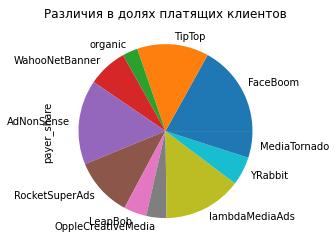

In [35]:
share_payments_client(channel_counts_payer)

Доли распределились следующим образом: FaceBoom - лидер по привлечению обоих сегментов, AdNonSense - второй, TipTop - третий. Эти данные необходимы для дальшейшего анализа.

**Итог исследовательского анализа данных:**

- Больше всего клиентов нашего сервиса из США, а также наиболее 'покупающими' клиентами являются также представители Соединённых Штатов: регион влияет на продажи.

- Большинство пользователей используют девайсы компании Apple, но это особо не влияет на конвертацию пользователей в платящих. Скорее всего преобладание пользователей Iphone обусловлено преобладанием клиентов из США.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

1) **Посчитайте общую сумму расходов на маркетинг:**

In [36]:
print(f"{round(ad_costs['costs'].sum())}$ - общая сумма затрат на маркетинг за 179 дней")

105497$ - общая сумма затрат на маркетинг за 179 дней


2)**Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник:**

In [37]:
ad_costs_pt = ad_costs.pivot_table(index='channel', values='costs',  aggfunc='sum').sort_values(by='costs', ascending=False)
ad_costs_pt.rename(columns={'costs': 'total_sum'}).style.background_gradient('coolwarm')

,total_sum
channel,
TipTop,54751.300000
FaceBoom,32445.600000
WahooNetBanner,5151.000000
AdNonSense,3911.250000
OppleCreativeMedia,2151.250000
RocketSuperAds,1833.000000
LeapBob,1797.600000
lambdaMediaAds,1557.600000
MediaTornado,954.480000


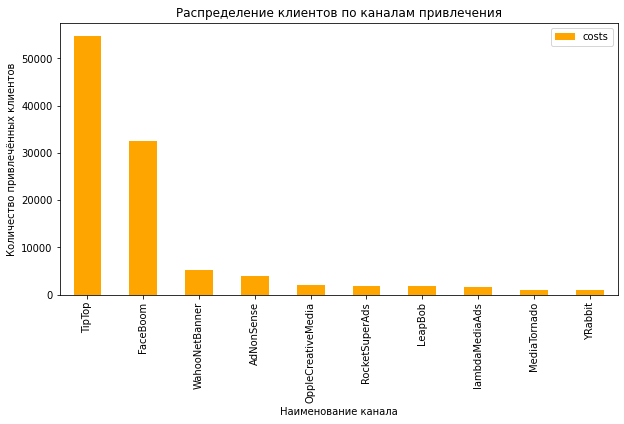

In [38]:
ad_costs_pt.plot(kind='bar', figsize=(10, 5), color='orange')
plt.title('Распределение клиентов по каналам привлечения')
plt.xlabel('Наименование канала')
plt.ylabel('Количество привлечённых клиентов')
plt.show()

Большая часть маркетинговых инвестиций приходится на 2 канала: TipTop и FaceBoom, которые привлекают большинство клиентов, что ожидаемо. Остаётся вопрос о окупаемости данных клиентов.

3) **Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику:**

Добавим атрибут со значением месяца и недели привлечения пользователя: 

In [39]:
ad_costs['dt'] = pd.to_datetime(ad_costs['dt'])
ad_costs['week'] = ad_costs['dt'].dt.week

ad_costs['dt'] = pd.to_datetime(ad_costs['dt'])
ad_costs['month'] = ad_costs['dt'].dt.month

Проверим:

In [40]:
ad_costs.tail(10)

,dt,channel,costs,week,month
1790,2019-10-18,lambdaMediaAds,8.0,42,10
1791,2019-10-19,lambdaMediaAds,5.6,42,10
1792,2019-10-20,lambdaMediaAds,8.8,42,10
1793,2019-10-21,lambdaMediaAds,7.2,43,10
1794,2019-10-22,lambdaMediaAds,6.4,43,10
1795,2019-10-23,lambdaMediaAds,4.0,43,10
1796,2019-10-24,lambdaMediaAds,6.4,43,10
1797,2019-10-25,lambdaMediaAds,8.8,43,10
1798,2019-10-26,lambdaMediaAds,8.8,43,10
1799,2019-10-27,lambdaMediaAds,12.0,43,10


- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику:

Создадим сводную таблицу и построим по ней график:

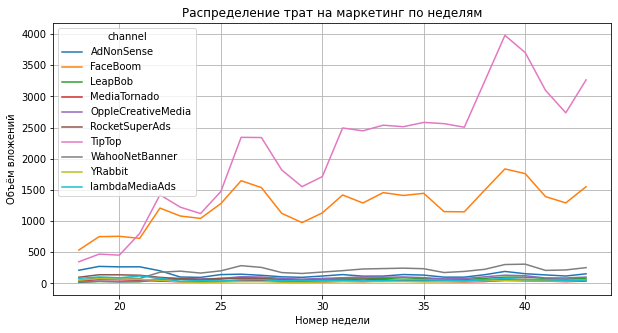

In [41]:
ad_costs_pt_1 = ad_costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(10, 5))
plt.title('Распределение трат на маркетинг по неделям')
plt.xlabel('Номер недели')
plt.ylabel('Объём вложений')
plt.show()

- Визуализируем динамику изменения расходов во времени по месяцам по каждому источнику:

Создадим сводную таблицу и построим по ней график:

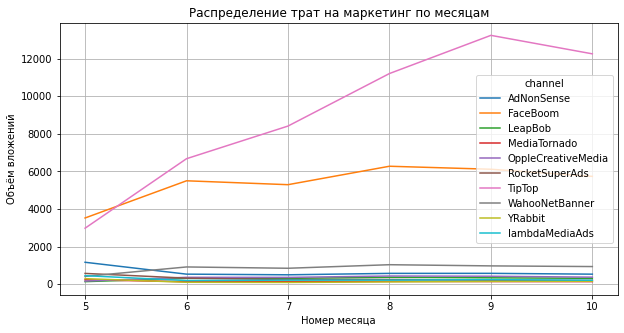

In [42]:
ad_costs_pt_1 = ad_costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(10, 5))
plt.title('Распределение трат на маркетинг по месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Объём вложений')
plt.show()

Огромные объёмы вложений в каналы стимулируют рост финансовых потоков компании. При этом видно что пытались нарастить темпы вложений за счёт возрастающего увеличения инвестиций в маркетинг, но с каналами ошиблись многовероятно раз по итогу пришли к общему убытку. Очень cтранно что на протяжении долгого времени маркетинговые ресурсы не попытались разделить между каналами привлечения, а вкладывали и вкладывали только в два  канала. Инвестиции в другие каналы привлечения невероятно малы по сравнению с двумя гигантами, на которых компания скорее всего потеряла много ресурсов.

**Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей:**

In [43]:
cac = (profiles
       .pivot_table(index = 'channel',
                    values = 'acquisition_cost',
                    aggfunc='mean')
       .sort_values(by='acquisition_cost', ascending=False)
       .rename(columns={'acquisition_cost': 'cac'})
      )
cac.style.background_gradient('coolwarm')

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


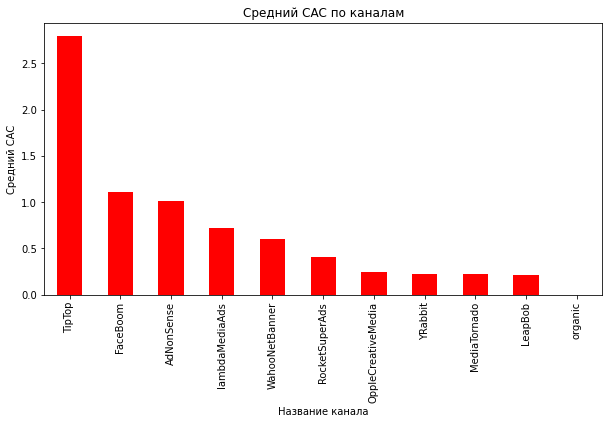

In [44]:
cac.plot(kind='bar', color='red', legend=False, figsize=(10, 5))
plt.title('Средний CAC по каналам')
plt.xlabel('Название канала')
plt.ylabel('Средний CAC')
plt.show()

Самые дорогие привлечения свойствены следующим каналам: TipTop, FaceBoom, AdNonSense. TipTop - лидер по стоимотси привлечения. Если такие большие вложения в данные каналы не окупаются, то скорее всего проблема в виде убытка компании заключается в этом. Будем смотреть дальше.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Исключим органических пользователей из анализа, т.к. они не способны приносить убытки, а наша цель - найти проблему и разрешить её наиболее эффективным образом.

In [45]:
profiles = profiles.query('channel != "organic"')

1) Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI:

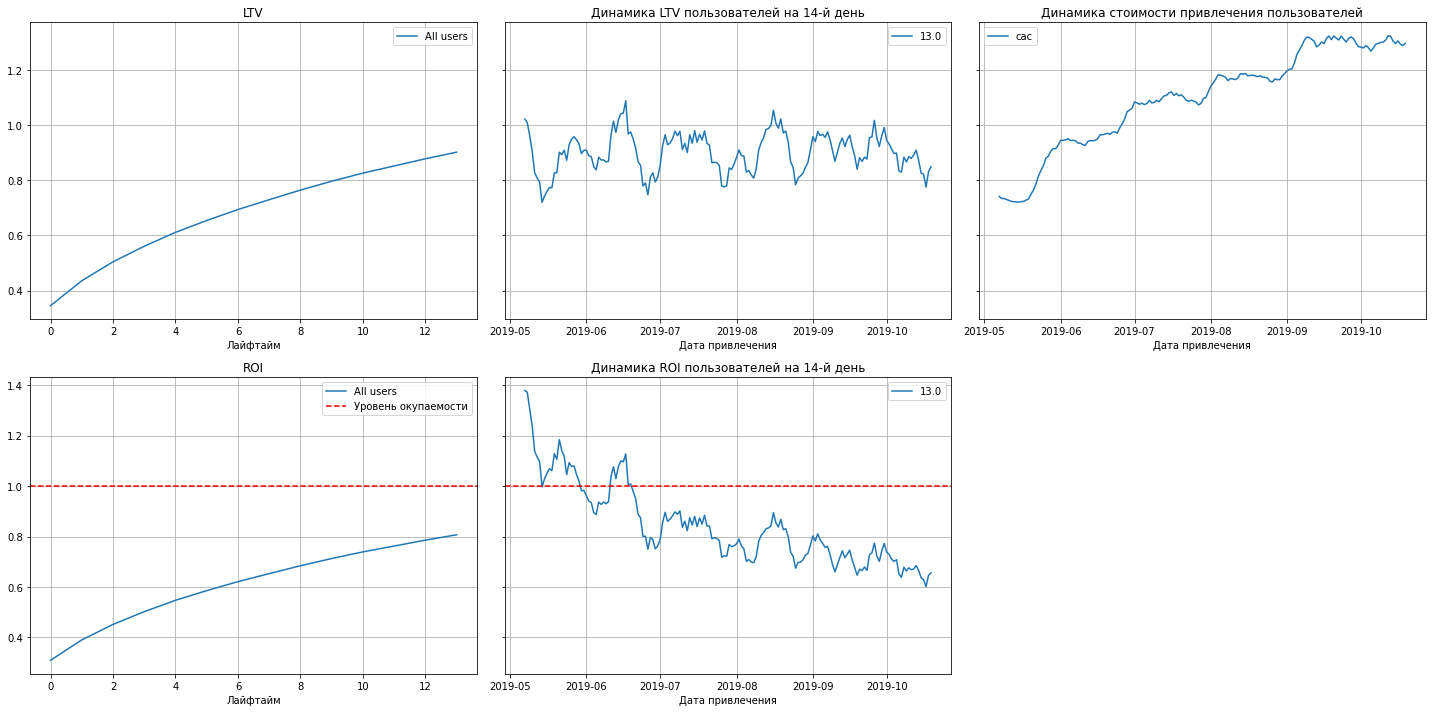

In [46]:
analysis_horizon = 14

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

Инвестиции в маркетинг не окупаются: за две недели линия уровня окупаемости не пересечена, а CAC растет почти все время. Рекламные компании проходят регулярно, т. к. LTV стабилен. Пользователи примерно одинакового качества: график дианмики LTV пользователей на 14-й день относительно стабилен.

2) Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

Конверсия всех каналов:

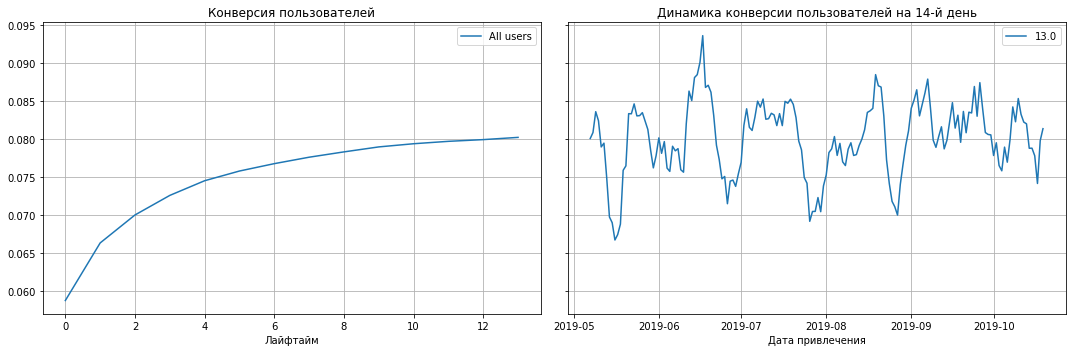

In [47]:
dimensions = []
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия с каждым лайфтаймом растёт, динамика впрлне приемлима: аномалий нет.

Конверсия по каждому каналу отдельно:

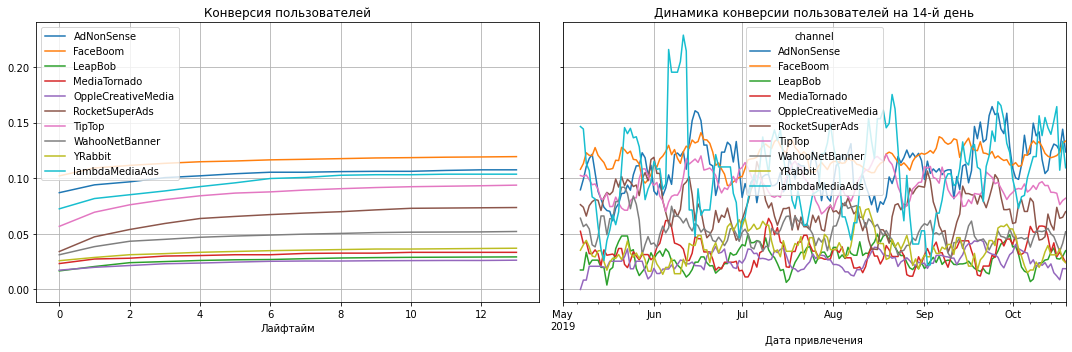

In [48]:

dimensions = ['channel']

# конверсия основных каналов 
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия многих каналов не велика: до 0.05 на 13-й лайфтайм. К таким каналам относятся: WahooNetBanner, YRabbit, MediaTornado, OppleCreativeMedia, LeapBob. Стоит выделить каналы с высокой относительной конверсией: FaceBoom, AdNonSense, lambdaMediaAds, TipTop: значение конверсии у этих каналов на 13-й лайфтайм составляет от ~ 0.08 - ~ 0.12. Околонулевой конверсии нет: аномалий многовероятно не присутствует.

Т.к. основной маркетинговый бюджет уходит на 3 канала, то посмотрим конверсию именно по ним:

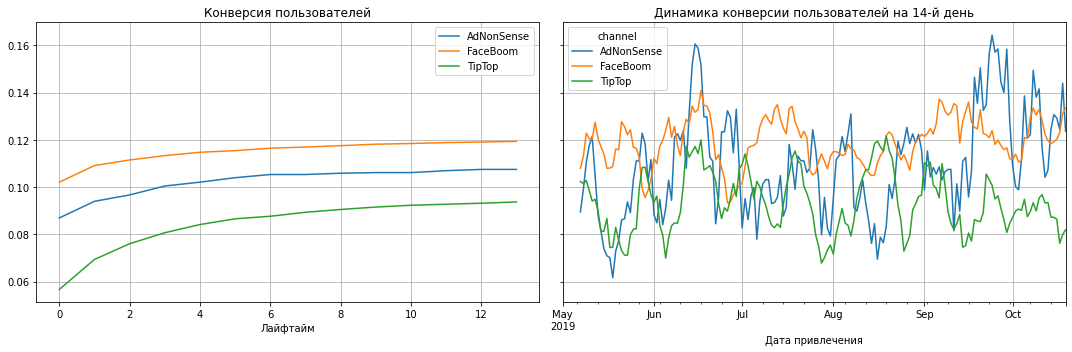

In [49]:
main_channels = ['TipTop', 'FaceBoom', 'AdNonSense'] 
dimensions = ['channel']

# конверсия основных каналов 
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel in @main_channels'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Заметных сильных проблем конвертации пользователей в платящих по какому-то конкретному каналу не обнаружено.

Взглянем на конверсию по устройствам:

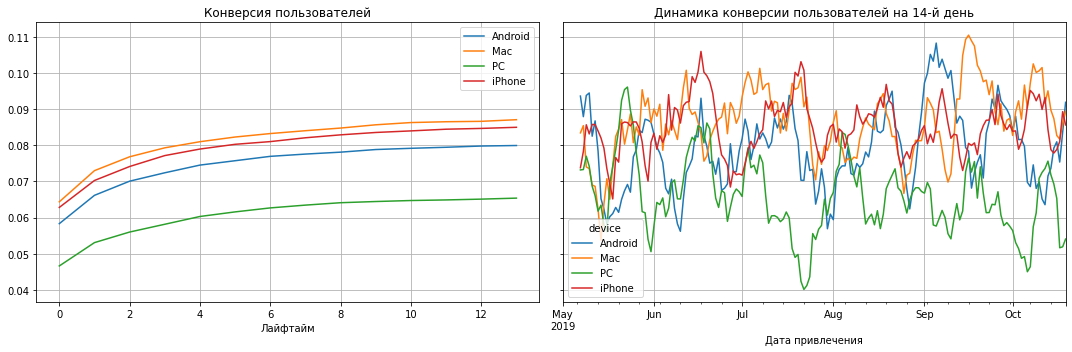

In [50]:

dimensions = ['device']

# конверсия основных каналов 
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Графики конверсий по устройствам показывают вполне адекватную модель: околонулевой конверсии нет. Из необычного видно что у клиентов ПК конверсия значительно меньше иных устройств. 

Посмотрим конверсию по странам:

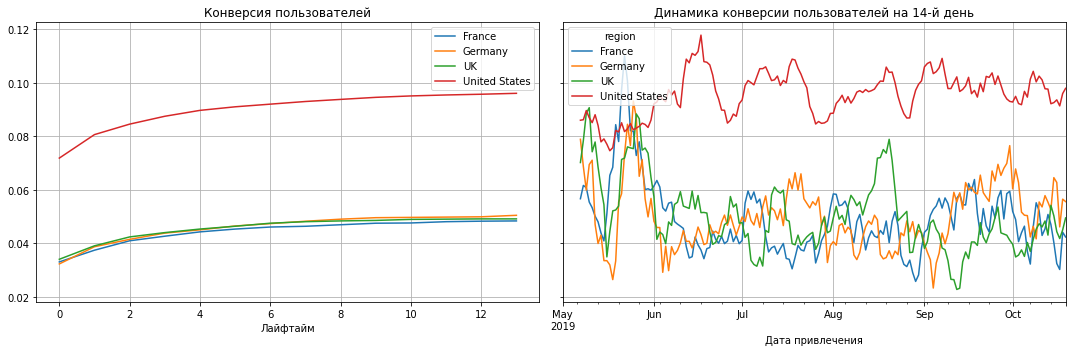

In [51]:

dimensions = ['region']

# конверсия основных каналов 
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Графики конверсии по странам сообщают нам следующее: конвертация клиентов из США проходит примерно в раза лучше, чем конвертация клиентов из других регионов, а остальные регионы имеют примерно одинаковую конверсию ~ 0.03 - ~ 0.05, когда у клиентов из США этот показатель имеет диапозон от ~0.07 до ~ 0.1. Таким образом, если в теории у нас есть выбор между каналами из разных регионов при одинаковой себестоимости, то наилучшим решением будет выбор клиентов из США, ведь они лучше конвертируются.

Графики удержания:

Общее удержание(по всем каналам сразу):

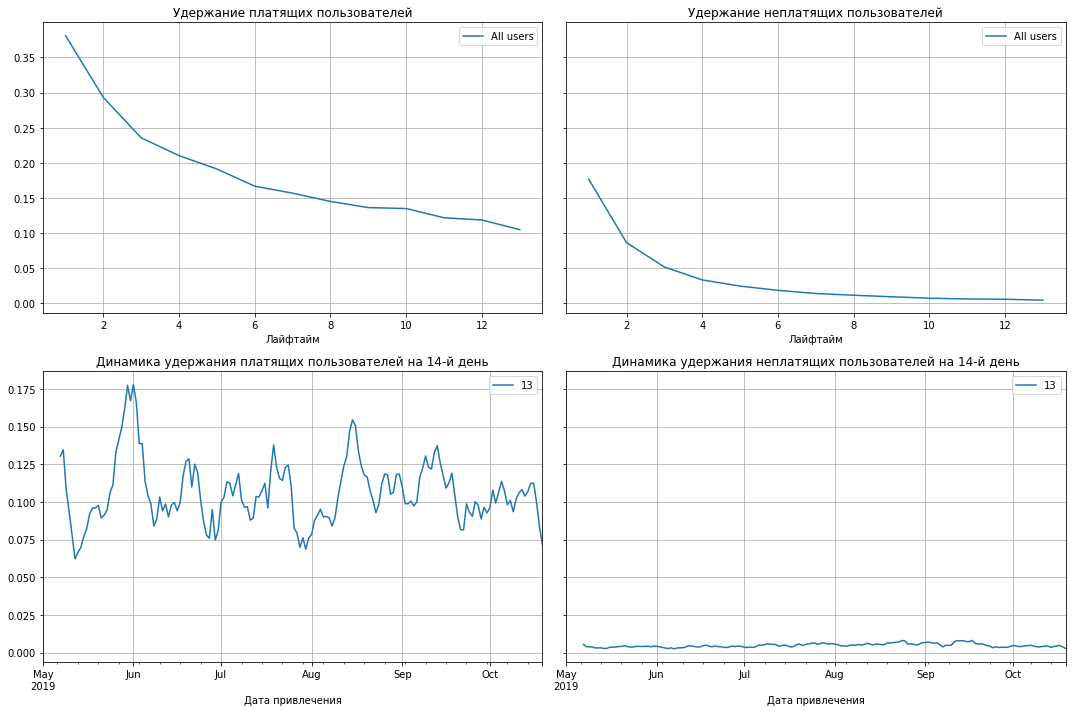

In [52]:

dimensions = []
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Вполне тривиальные графики: удержание платящих и неплатящих пользователей постепенно падает. Интерес вызывают графики динами удержания для платящие и неплатящих пользователей: они сильно различаются. Динамика неплатящих пользователей стабильна, а вот динамика платящих наоборот имеет скачкообразную линию. 

Удержание по каналам:

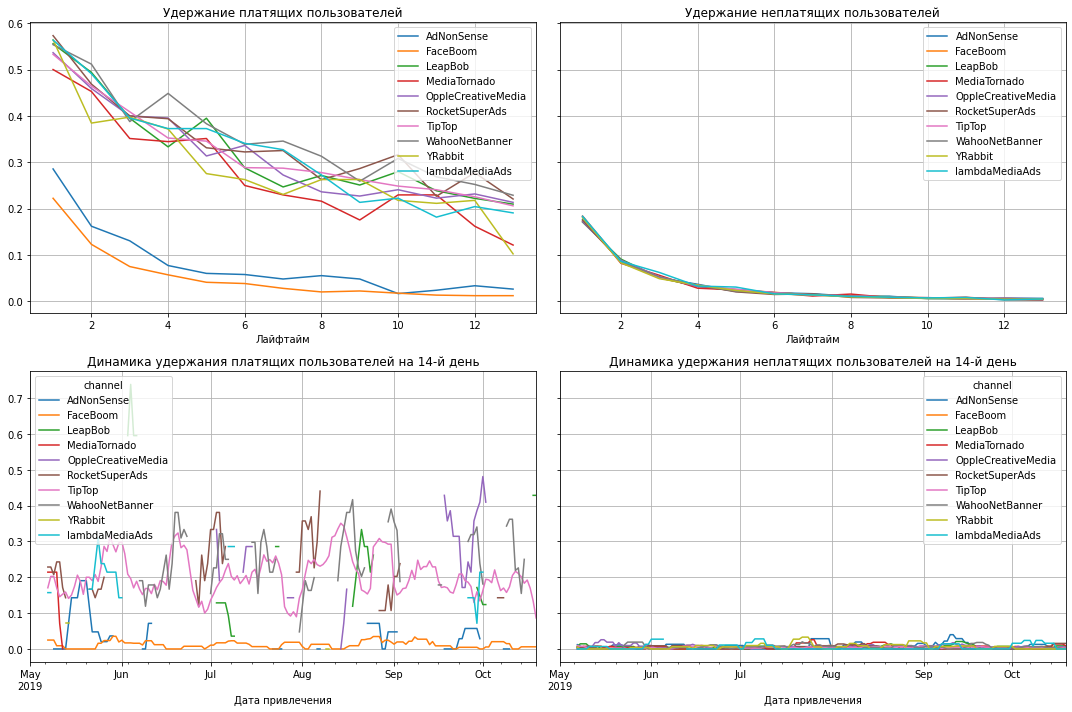

In [53]:

dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание у каналов AdNonSense и FaceBoom слабое относительно других: скорее всего эти каналы привлекают нецелевую аудиторию.

Посмотрим на удержание 3-х наиболее затратные канала:

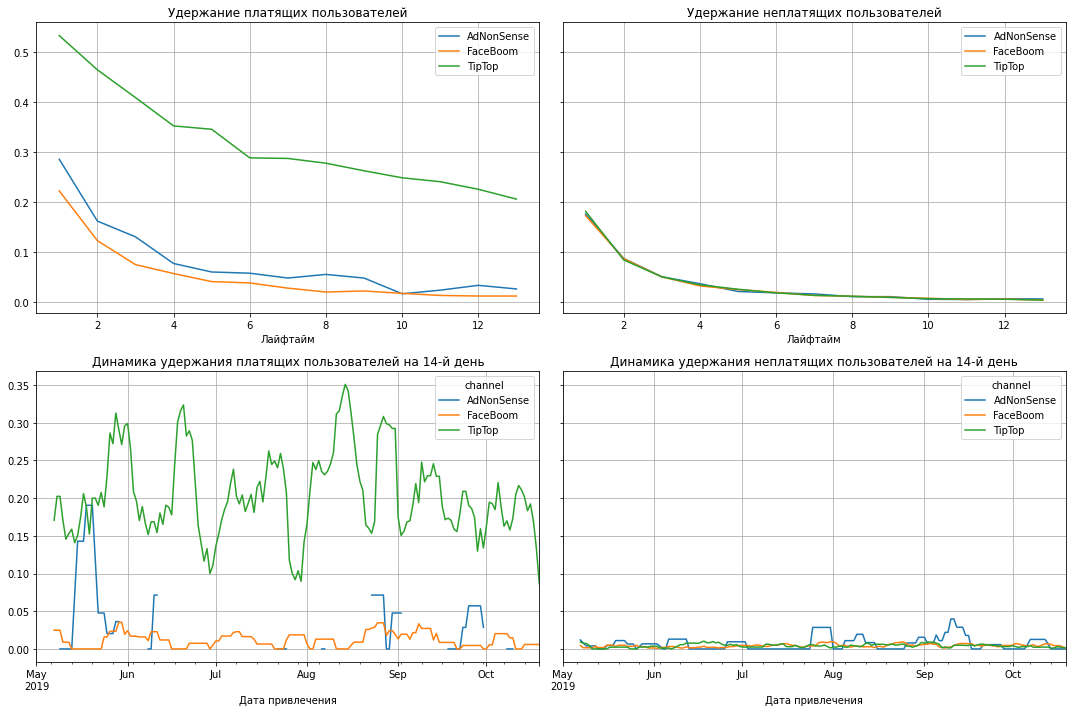

In [54]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel in @main_channels'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание неплатящих пользователей из разных каналов весьма ровное, а удержание платящих очень отличается. Возможно что платящие пользователи приобретают какие-то подписки которые мотивируют их проявлять активность.

Каналы AdNonSense и FaceBoom привлекают не целевую аудиторию, а канал TipTop при адекватных показателях удержания просто слишком дорогой.

Удержание по регионам:

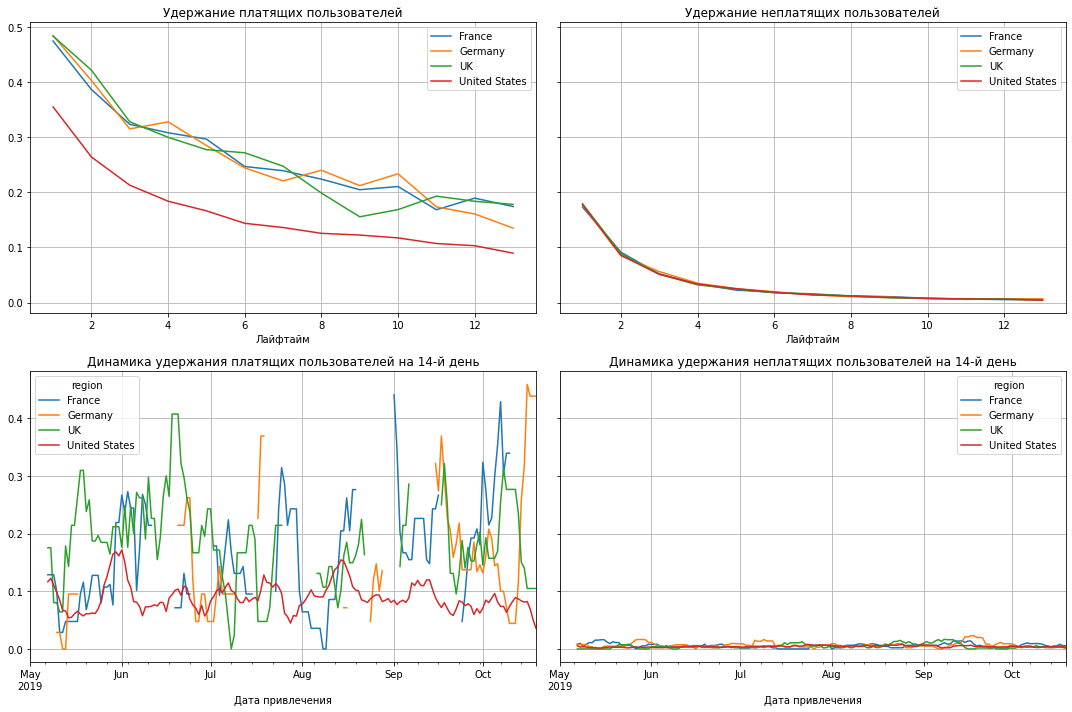

In [55]:

dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Из того что мы ещё не установили на других графиках с удержанием: удержание платящих пользователей из США значительно хуже остальных регионов, остальные показывают примерно одинаковый уровень. Таким образом, клиенты из США показывают лучшую конверсию, но при этом худшее удержание.

Удержание по странам:

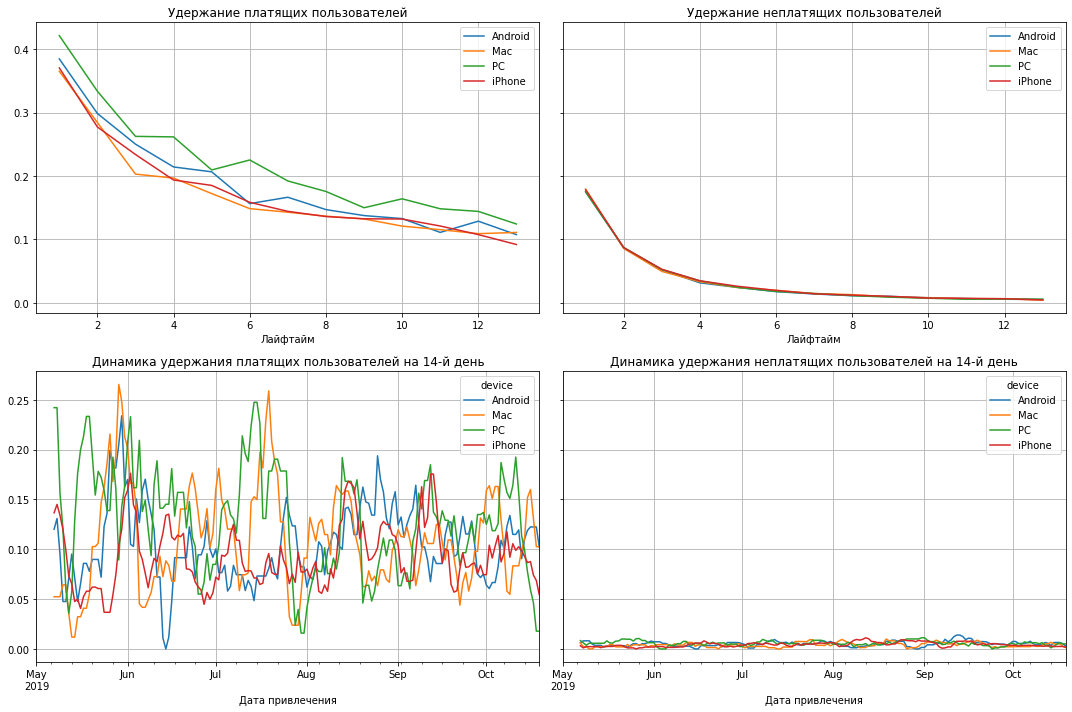

In [56]:

dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Каких-то интересных моментов удержания в дифференциации по устройствам на графиках нет: все довольно адекватны и линии описывающие удержание по устройствам сильно похожи как по уровню, так и по поведению.

3) Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

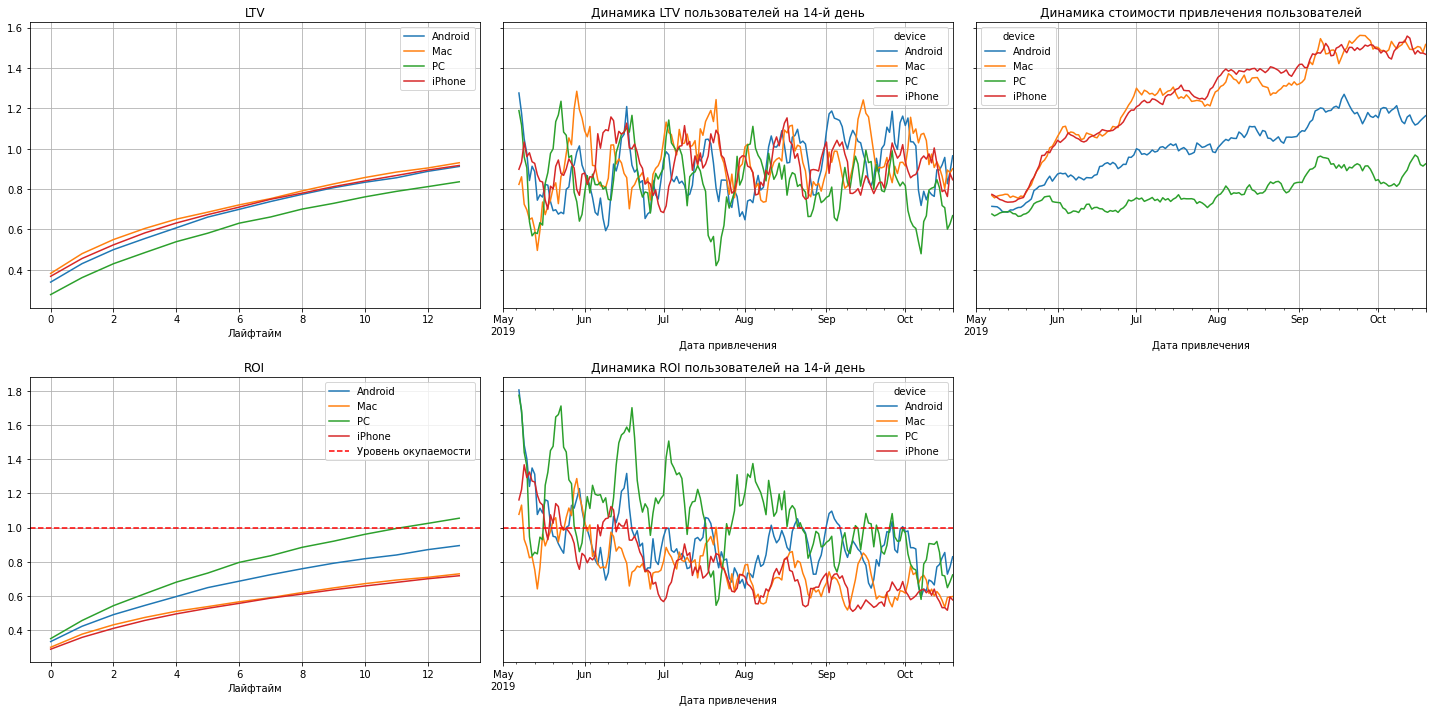

In [57]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

Результируем графики:
- окупаются только пользователи ПК;
- средняя стоимость привлечения(CAC) везде растёт;
- LTV стабилен;
- Apple-юзеры окупаются хуже всего.



4) Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

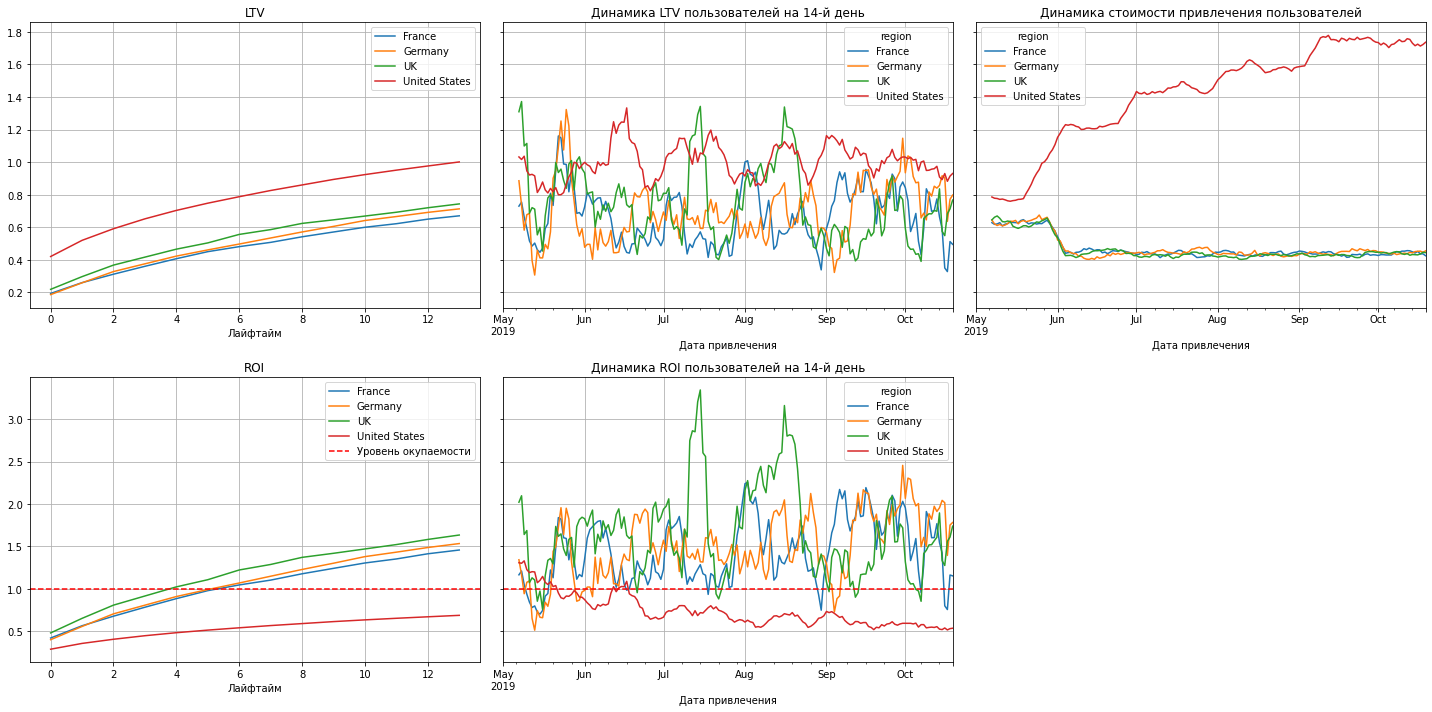

In [58]:

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

В Европе реклама окупается за первую неделю, в США не окупается совсем(за 14 дней). Средняя стоимость привлечения клиента растет в США, в Европе снижается в июне и дальше держится стабильно низко, LTV стабилен везде.


Печально что самый масштабный регион для нашего сервиса не окупается, а следовательно самый большой сегмент пользователей девайсов(Apple) также является убыточным, ведь большинство таких юзеров из США. 

5) Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

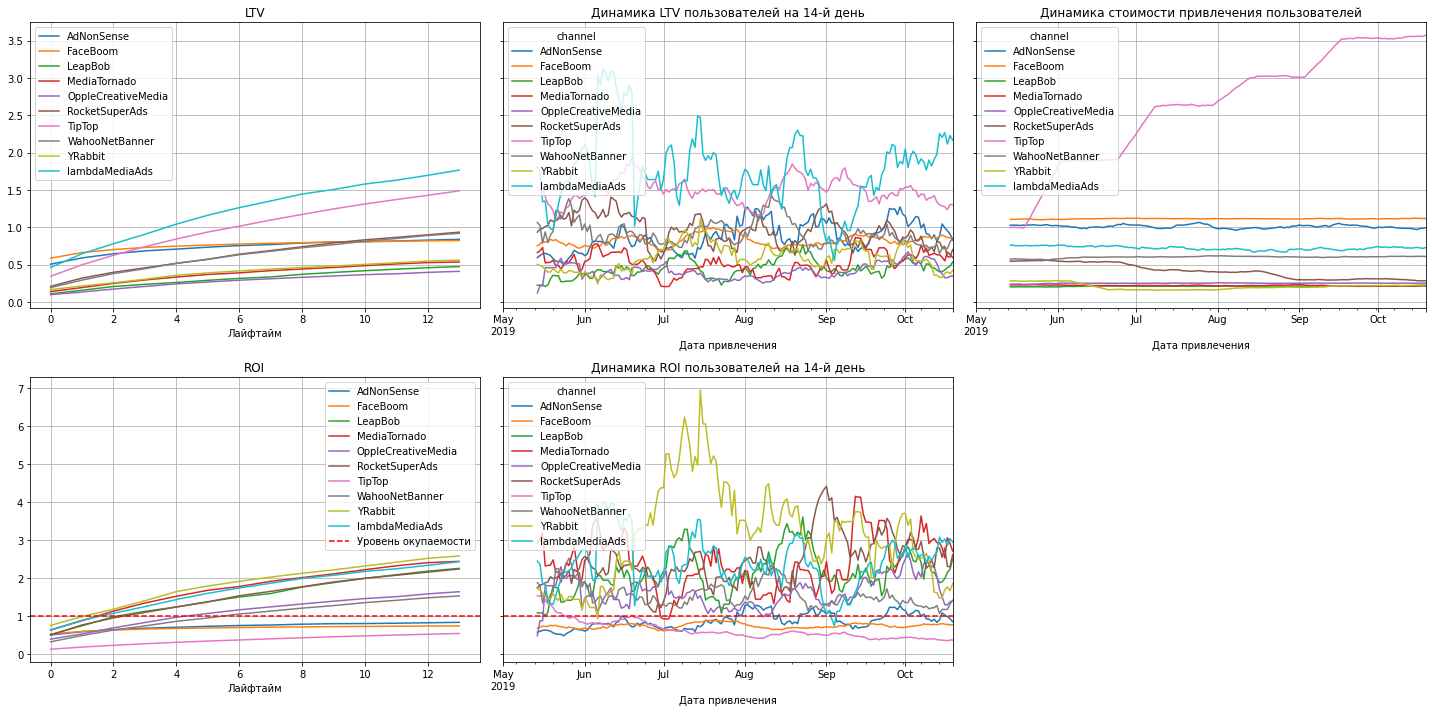

In [59]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

2 самых дорогих канала для привлечения клиентов не окупаются на 13-й лайфтайм. Это хорошо видно на графике 'ROI': 3 канала не окупают затрат за 14 дней жизни(TipTop, FaceBoom), ещё канал 'AdNonSense'является убыточным, но в него компании не вкладывала такие колоссальные суммы. 

По графику динамики стоимости привлечения пользователей 3 наиболее затратных для компании канала(наивысший CAC): TipTop, FaceBoom, AdNonSense - ни один из них не окупается.

По графику LTV: 3 наиболее затратных канала показывают рост - это тривиально, другим каналам просто не хватает ресурсов для демонстрации хорошего LTV по сравнению с этими тремя: необходимо предоставить возможность 'раскрыться' этим каналам. Удивительной находкой является канал lambdaMediaAds - наивысший LTV, при относительно низких инвестициях в него.

Найдём каналы привлечения клиентов из США, которые окупаются и являются лучшими в нашей выборке:

Отберём каналы которые привлекают клиентов из США:

In [60]:
us_chanel = profiles.query('region == "United States"')['channel'].unique()
us_chanel

array(['FaceBoom', 'YRabbit', 'MediaTornado', 'RocketSuperAds', 'TipTop'],
      dtype=object)

Построим графики и определим каналы с лучшей окупаемостью:

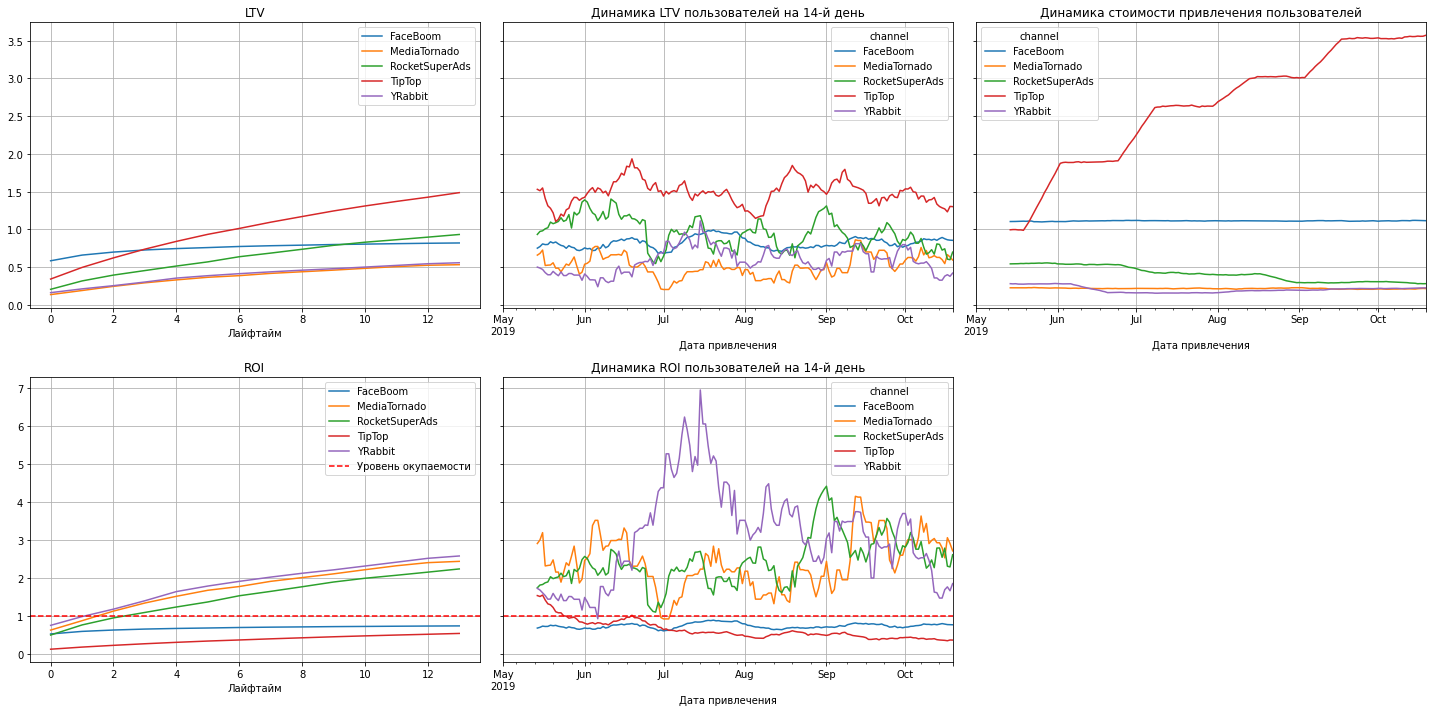

In [61]:

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel in @us_chanel'), orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

Если мы хотим сохранить клиентов из США, то наилучшими вариантами для инвестирования являются каналы YRabbit, MediaTornado, RocketSuperAds по меркам окупаемости. Уже по оканчании 2-го лайфтайма они окупают свои затраты и далее приносят компании только прибыль.

RocketSuperAds имеет наилучший показатель LTV из вышеперечисленных, а также уровень конверсии также наилучший, неплохой уровень удержания, поэтому именно этот канал для привлечения клиентов из США на данный момент самый перспективный.

**Вывод/ответы на важные вопросы:**

- Реклама, направленная на привлечение пользователей не окупается.
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
  1)Устройста: все кроме PC(Iphone и Mac хуже всего) не окупаются;
  2)Страны: US является наиболее масштабным регионом, но он полностью не окупается.
  3)Рекламные каналы: 3 основных канала в которые компания инвестировала деньги не окупаются: 2 имеют свойство привлекать не целевых клиентов, а один слишком дорогой, хотя другие показатели у него в норме.


Проблемы окупаемости в основе вызваны неправильным выбором каналов привлечения, всё остальное является следствием.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Вывод:**

 Мы провели анализ активности пользователей приложения Procrastinate Pro+. Нашей целью было установить причину убытков компании при активной позиции инвестировать огромные финансы в рекламу. С данной задачей мы справились и имеем такие итоги:
 
Проблемы:
 
- Большинство наших пользователей из США (превышает все остальные регионы вместе), при этом и покупки они совершают почти в 2 раза чаще любого другого региона, но проблема в том, что привлечь такого пользователя стоит дорого и он не окупается.

- Разновидность девайса не особо влияет на покупки пользователей. В нашем случае получилась очень большая доля Apple-юзеров и самая плохая окупаемость была также у них. Потому что большинство обладателей Apple девайсов приходится как раз на США.

- Большинство трат компании приходятся на 3 полностью убыточных канала: TipTop, FaceBoom, AdNonSense.


 Пути разрешения проблемы убытка компании:
 однозначно необходимо перераспределить инвестиции в рекламу:
 - Перестать полностью инвестировать финансы в убыточные каналы: TipTop, FaceBoom, AdNonSense(при очень высоких инвестициях компании данные каналы не окупают себя, у канала FaceBoom при этом наблюдается наихудший уровень удержания относительно всех каналов привлечения). 
 - Так как клиенты из США относительно дорогие, то стоит больше присмотреться к клиентам из Европы или же инвестировать финансы в канал привлечения Американских клиентов с невысокой относительной ценой и который как минимум будет окупаться: RocketSuperAds как вариант. RocketSuperAds имеет наилучший показатель LTV из вышеперечисленных, а также уровень конверсии также наилучший, неплохой уровень удержания, поэтому именно этот канал для привлечения клиентов из США на данный момент самый перспективный.
 - Наилучшим вариантом для привлечения Европейских клиентов является канал lambdaMediaAds: у него везде можно заметить хорошие показатели, хотя вложения в него были небольшие и заметить при таком раскладе его эффективность считаем огромной удачей. lambdaMediaAds имеет лучший показатель LTV относительно всех каналов, высокий уровень удержания и конверсии: возможно если бы компания финансировала этот канал также хорошо как FaceBoom или TipTop, то именно он стал бы лучшим каналом по большинству бизнес-метрик(возможно и по всем).
 - Рекомендуем посильнее дифференцировывать рекламный бюджет между каналами или чаще мониторить ситуацию, а лучше всё вместе . Проблема всегда может пройзойти из-за различных факторов и от этого никто не застрахован: лучше выбрать 5-10 неубыточных каналов и немного больше инвестировать в эффективнейшие на данный момент каналы, и за счёт мониторинга успевать адаптировать рекламный бюджет.
 
  Для начала предлагаем полностью отказаться от каналов TipTop, FaceBoom, AdNonSense. Половину средств рекламного бюджета инвестировать в lambdaMediaAds(для привлечения клиентов из Европы) и RocketSuperAds(для привлечения клиентов из США), а другую половину распределить между неубыточными каналами с хорошим потенциалом, чтобы при некоторых прецендентам заметить каналы с хорошими показателями и не потерять крупные финансы компании если вдруг каналы lambdaMediaAds или RocketSuperAds станут резко убыточными. Необходимо чаще мониторить бизнес-показатели и быстро реагировать на изменения показателей, чтобы не терять финансы. 